In [5]:

import numpy as np
from matplotlib import pyplot as plt

###########
# Functions
def rotate_vec (VEC,ANGLE):
    return [VEC[0]*np.cos(ANGLE) - VEC[1]*np.sin(ANGLE), VEC[0]*np.sin(ANGLE) + VEC[1]*np.cos(ANGLE)]

def angle_target_nei (XY_TARGET,XY_NEI,XY_REF):
    # Vector Target --> Nei
    dx = XY_NEI[0] - XY_TARGET[0]
    dy = XY_NEI[1] - XY_TARGET[1]
    dr = np.sqrt(dx**2 + dy**2)
    dr_ref = np.sqrt(XY_REF[0]**2 + XY_REF[1]**2)
    # Calculate theta
    dot_product = dx * XY_REF[0] + dy * XY_REF[1]
    cos_theta = dot_product / (dr * dr_ref)
    theta = np.arccos(cos_theta)
    # Rotate Ref by pi/2
    xy_ref_rotate = rotate_vec(XY_REF,0.5*np.pi)
    dot_product2 = dx * xy_ref_rotate[0] + dy * xy_ref_rotate[1]
    # To avoid bad rounding
    if np.abs(dot_product2) < 10**(-15):
        dot_product2 = 0.
    # Check cadrant
    if dot_product2 < 0.:
        theta = 2.*np.pi - theta
    return theta

def opening_angle_target_nei (XY_TARGET,XY_NEI,R_NEI):
    # Normalize nei vec
    dx = XY_NEI[0] - XY_TARGET[0]
    dy = XY_NEI[1] - XY_TARGET[1]
    dr = np.sqrt(dx**2 + dy**2)
    dx2 = dx / dr
    dy2 = dy / dr
    # Rotate normalized nei vec
    xy_nei_rotate = rotate_vec([dx2,dy2],0.5*np.pi)
    # Multiply by R_NEI
    xy_nei_rotate = [xy_nei_rotate[0]*R_NEI,xy_nei_rotate[1]*R_NEI]
    # Vec perp to NEI, norm = R_NEI
    rnei_vec_nei = [dx + xy_nei_rotate[0],dy + xy_nei_rotate[1]]
    # Calculate beta
    dot_product = dx2 * rnei_vec_nei[0] + dy2 * rnei_vec_nei[1]
    cos_beta = dot_product / np.sqrt(rnei_vec_nei[0]**2 + rnei_vec_nei[1]**2)
    beta = np.arccos(cos_beta)
    return beta

def gauss_theta_beta (THETA,BETA,STEP):
    # Declare array angles
    angle = np.zeros(STEP)
    angle_step = 2.*np.pi / (STEP)
    # Angle step
    theta_n = THETA/(2.*np.pi)
    idx_theta = int(theta_n*STEP)
    # Fill array
    angle[idx_theta] = (1./(BETA * np.sqrt(np.pi)))
    for i in range(1,int(0.5*STEP)+1): # Visit right and left around theta 
        # Right/Left index
        idx = idx_theta + i
        idx2 = idx_theta - i
        # Check modulo of indices
        idx = int(np.mod(idx,STEP))
        idx2 = int(np.mod(idx2,STEP))
        # Right/Left angles
        angle_theta = i*angle_step
        angle_theta2 = -i*angle_step
        # Gaussian
        angle[idx] = (1./(BETA * np.sqrt(np.pi))) * np.exp(-((angle_theta)**2) / (2.*BETA**2))
        angle[idx2] = (1./(BETA * np.sqrt(np.pi))) * np.exp(-((angle_theta2)**2) / (2.*BETA**2))
    return angle

def normalize_distrib(DISTRIB):
    sum_distrib = np.sum(DISTRIB)
    return DISTRIB/sum_distrib
###########





    



In [10]:
###########
# Main code

# Position and radius of target cell 
xy_target = [1.,0.]
rtarget = 1.
# Positions and radiic of nei cells
xy_nei = [[xy_target[0],xy_target[1]-2],[xy_target[0]+2,xy_target[1]+2],[xy_target[0]+2,xy_target[1]-2],[xy_target[0]-2,xy_target[1]+2]]
r_nei = [0.5,0.5,1.,0.75]
# Unitary vector to chose the direction of reference
xy_ref = [1.,0.]
# Discretization of angles for the distribution
step = 100
# Declare proba angles


pre [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 100

[2.72043729e-09 5.08325411e-10 8.89357588e-11 1.45694281e-11
 2.23480733e-12 3.20973489e-13 4.31648001e-14 5.43527847e-15
 6.40833725e-16 7.07457593e-17 7.31285496e-18 7.07790944e-19
 6.41437783e-20 5.44296533e-21 4.32462139e-22 3.21730408e-23
 2.24113296e-24 1.46175514e-25 8.92715611e-27 5.10485163e-28
 2.73328308e-29 1.37030612e-30 6.43253375e-32 2.82734005e-33
 1.16360482e-34 4.48398829e-36 1.16360482e-34 2.82734005e-33
 6.43253375e-32 1.37030612e-30 2.73328308e-29 5.10485163e-28
 8.92715611e-27 1.46175514e-25 2.24113296e-24 3.21730408e-23
 4.32462139e-22 5.44296533e-21 6.41437783e-20 7.07790944e-19
 7.31285496e-18 7.07457593e-17 6.40833725e-16 5.43527847e-15
 4.31648001e-1

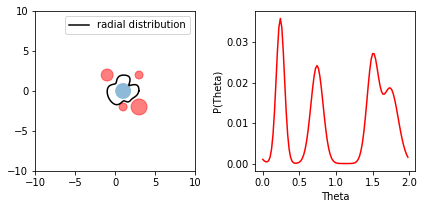

In [13]:
proba_angles = np.zeros(step)
# Declare figure
figure, axes = plt.subplots(1,2)
# Draw target cell
circle_target = plt.Circle((xy_target[0], xy_target[1]), 1 ,alpha = 0.5)
axes[0].add_artist(circle_target)

print("pre", proba_angles, len(proba_angles))
# Loop over nei
for i in range(len(xy_nei)):
    # position and radius of nei
    xyn = xy_nei[i]
    rnei = r_nei[i]
    # Draw nei cell
    circle_nei = plt.Circle((xyn[0], xyn[1]), rnei, color='r',alpha = 0.5)
    axes[0].add_artist(circle_nei)
    # Compute theta
    theta = angle_target_nei (xy_target,xyn,xy_ref)
    # Compute beta
    beta = opening_angle_target_nei (xy_target,xyn,rnei)
    # Compute corresponding distribution
    proba_angles += gauss_theta_beta (theta,beta,step)
    print()
    print(proba_angles, len(proba_angles))
    
    
    
    
    
# Compute radial distribution
theta2 = np.linspace( 0 , 2 * np.pi , step )
prob = -proba_angles/max(proba_angles) + 2.
a = xy_target[0] + prob * np.cos( theta2 )
b = xy_target[1] + prob * np.sin( theta2 )
# Plot radial distribution
axes[0].plot(a,b,c="k",label = "radial distribution")
# Set axis limits, may change depending on the position of the nei
axes[0].set_xlim([-10,10])
axes[0].set_ylim([-10,10])
# Plot P(theta). between 0 and 2 (unit of pi)
axes[1].plot(np.arange(step)*2/step,proba_angles/np.sum(proba_angles),c="r")
# Cosmetic
axes[1].set_xlabel("Theta")
axes[1].set_ylabel("P(Theta)")
axes[0].set_aspect(1.0/axes[0].get_data_ratio(), adjustable='box')
axes[1].set_aspect(1.0/axes[1].get_data_ratio(), adjustable='box')
axes[0].legend()
plt.tight_layout()
# Show
plt.show()
###########

In [14]:
l = [1,2]
l2 = [2,4]
print(l + l2)

[1, 2, 2, 4]


In [15]:
l = [1,2]
l2 = [2,4]
print(np.array(l) + np.array(l2))

[3 6]
